In [1]:
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPool2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Model, load_model, save_model

from tensorflow.keras.callbacks import EarlyStopping ,CSVLogger
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from math import ceil
import pandas as pd 
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn as sk
import keras 
from tensorflow.keras import datasets, layers, models
%matplotlib inline

# Functions

In [2]:


def load_data(dir_list, image_size):


    # load all images in a directory
    data = []
    label = []
    image_width, image_height = image_size
    
    for directory in dir_list:
        for filename in os.listdir(directory):
            
            image = cv.imread(directory + '/' + filename,0)

            image = cv.resize(image, dsize=(image_width, image_height), interpolation=cv.INTER_CUBIC)

            image = image / 255.0
            image= image.astype(np.float32)

            data.append(image)

            if directory == 'yes':
                label.append([1]) ## have tumor
                
            else:
                label.append([0]) ## donot have tumor 
            

    data_array = np.array(data)
    label = np.array(label) 
    return data_array, label


        


# loading data 
now time to loading data with pre procssing like resizing ...


[1]


Text(0.5, 1.0, 'sample_image')

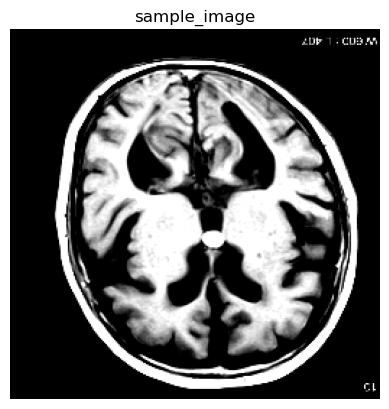

In [3]:
x,y=load_data(['yes','no'],(256,256))
# print(x[2])
print(y[2])
plt.imshow(x[2], cmap='gray')
plt.axis('off')
plt.title('sample_image')

# splitting data
for training data we have to split our data 
- train dataset 0.8
- validate dataset 0.2 (optional)
- test dataset 0.2 <br />
validation dataset in this case are equal

In [4]:
def split_data(test_size=0.2 , log=True):
    x_train, x_test_val, y_train, y_test_val = train_test_split(x, y, test_size=test_size,shuffle=True)
    if log==True : 
        print('Input Shape : ')
        print(x_train.shape,(y_train).shape)
        print(x_test_val.shape,(y_test_val).shape)
    x_test=x_test_val
    x_val=x_test_val
    y_test=y_test_val
    y_val=y_test_val
    
        
    x_train=x_train.reshape(-1,256,256,1)  
#     y_train=y_train.reshape(-1,100,100,1)  
#     y_test=y_test.reshape(-1,100,100,1)    
    x_test=x_test.reshape(-1,256,256,1)
    x_val=x_val.reshape(-1,256,256,1)
    if log==True : 
        print('Output Shape : ')
        print(x_train.shape,y_train.shape)
        print(x_test.shape,y_test.shape)
        print(x_val.shape,y_val.shape)
    return x_train, x_test, y_train, y_test,x_val,y_val
x_train, x_test, y_train, y_test,x_val,y_val=split_data()
validation_dataset=(x_val,y_val)


Input Shape : 
(2400, 256, 256) (2400, 1)
(600, 256, 256) (600, 1)
Output Shape : 
(2400, 256, 256, 1) (2400, 1)
(600, 256, 256, 1) (600, 1)
(600, 256, 256, 1) (600, 1)


# Build Model



In [5]:
def Build_Model(input_shape=(256,256,1)):
    Model = keras.models.Sequential([
            Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=input_shape),
            Conv2D(32,kernel_size=(3,3),activation='relu'),
            MaxPool2D(2,2),
            Conv2D(32,kernel_size=(3,3),activation='relu'),    
            Conv2D(32,kernel_size=(3,3),activation='relu'),    
            Conv2D(64,kernel_size=(3,3),activation='relu'),
            MaxPool2D(4,4),
            Flatten() ,    
            Dense(64,activation='relu') ,        
            Dense(32,activation='relu') ,   
            Dense(16,activation='relu'),
            Dropout(rate=0.5) ,            
            Dense(1,activation='sigmoid') ,    
            ])
    return Model

In [6]:
Model=Build_Model()
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      160       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 122, 122, 32)      9248      
                                                                 
 conv2d_4 (Conv2D)           (None, 120, 120, 64)      18496     
                                                        

In [ ]:
Model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [ ]:
def make_callbacks(csv_path='/kaggle/working/my_class_log_5.csv'):
    early_stop=EarlyStopping(monitor='val_loss',patience=8,mode='min',restore_best_weights=False)
    csv_logger=CSVLogger(csv_path)
    callbacks =[early_stop,csv_logger]
    return callbacks
callbacks=make_callbacks()

In [ ]:
epochs = 32
Model.fit(x_train, y_train, epochs=epochs,batch_size=32,verbose=1,callbacks=callbacks,validation_data=validation_dataset)

# saving trained model

In [ ]:
# Model.save('tumor_classification_trained_model_by_parham_2.h5')

# load training model

In [7]:
Model = load_model('tumor_classification_trained_model_by_parham_2.h5')

# evaluating

In [8]:
Model_loss, Model_accuracy = Model.evaluate(x_test, y_test)

print(f"it is Model accuracy: {Model_accuracy}")
print(f'it is Model loss: {Model_loss}')

19/19 [==============================] - 6s 273ms/step - loss: 0.0270 - accuracy: 0.9950
it is Model accuracy: 0.9950000047683716
it is Model loss: 0.02704336866736412


# Visualizing output

1/1 [==============================] - 0s 26ms/step
{'no4.jpg': 'do not have tumor', 'no421.jpg': 'do not have tumor', 'no422.jpg': 'do not have tumor', 'no426.jpg': 'do not have tumor', 'no427.jpg': 'do not have tumor', 'no9.jpg': 'do not have tumor', 'y11.jpg': 'Tumor Detected', 'y39.jpg': 'Tumor Detected', 'y44.jpg': 'Tumor Detected', 'y47.jpg': 'Tumor Detected', 'y53.jpg': 'Tumor Detected', 'y54.jpg': 'Tumor Detected'}


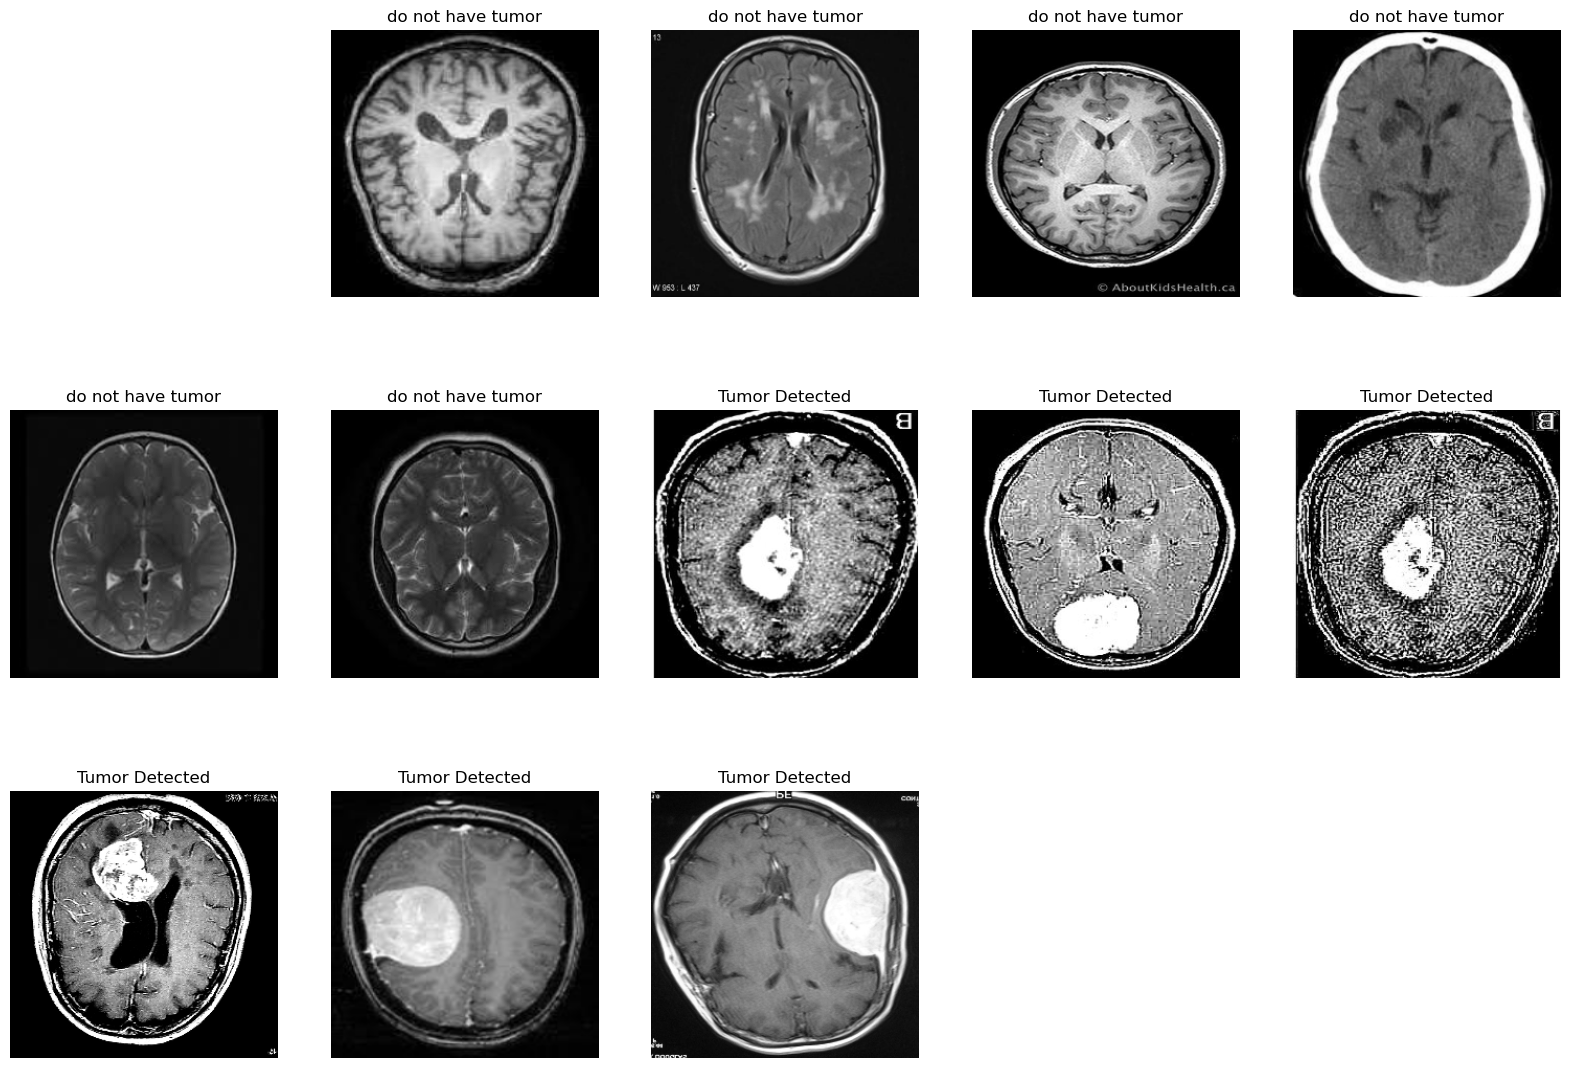

In [9]:
def predict_human_readable(array):
    array=array.flatten()
#     print(array[0])
    result=1 if array>0.5 else 0
    return result   
#----------------------------------------
def predict_on_custome_image(img_path,img_or_directory=False,plot=False):
    dict_1={}
    if img_or_directory==False :
        array=cv.imread(img_path,0)
        
        shape_array=array.shape
        array_1=cv.resize(array,(256,256))
        
        y,x=array_1.shape
#         array_1=array_1 / 255.0
        array=array_1.reshape(1,y,x,1)
        #-------
#         print(array.shape)
        y_predict=Model.predict(array)
        y_predict_res=predict_human_readable(y_predict)
        

        if y_predict_res== 1:
            predicted='Tumor Detected'
            
        else : 
            predicted='do not have tumor'
        
        dict_1.update({img_path:predicted})
        if plot==True :
            plt.imshow(array_1,cmap='gray')
            plt.title(predicted)
            plt.axis('off')
    else :
        all_img=os.listdir(img_path)
        image_count=len(all_img)
#         print(all_img)
        if plot==True :
            rows,columns=3,ceil(image_count/3)
            fig = plt.figure(figsize=(20, 14))
            
        for c,path in enumerate(all_img) :
            lst_1=path.split('.')
            if lst_1[1]=='jpg' or lst_1[1]=='png' or lst_1[1]=='jpeg': 
                array=cv.imread(img_path+'/'+path,0)
    #             print(img_path+'/'+path)
                shape_array=array.shape
                array_1=cv.resize(array,(256,256))
                y,x=array_1.shape
#                 array_1=array_1 / 255.0
#                 array_1= array_1.astype(np.float32)
                array=array_1.reshape(1,y,x,1)
                
            #-------

                y_predict=Model.predict(array)
                y_predict_res=predict_human_readable(y_predict)
                if y_predict_res==1 :
                    predicted='Tumor Detected'

                else : 
                    predicted='do not have tumor'
                dict_1.update({path:predicted})
                if plot==True :
                    fig.add_subplot(rows, columns, c+1)
                    plt.imshow(array_1,cmap='gray')
                    plt.title(predicted)
                    plt.axis('off')
            else :
                continue
    return dict_1           
a=predict_on_custome_image('plot_testing',img_or_directory=True,plot=True)
print(a)

# plot accuracy

In [17]:
csv=pd.read_csv('my_class_log_5.csv')
accuracy=csv['accuracy']
loss=csv['loss']
val_accuracy=csv['val_accuracy']
val_loss=csv['val_loss']
print(csv[['loss','val_loss','accuracy','val_accuracy']])

        loss  val_loss  accuracy  val_accuracy
0   0.577611  0.428239  0.712500      0.778333
1   0.397102  0.292536  0.830000      0.898333
2   0.205892  0.202001  0.920833      0.926667
3   0.164755  0.185451  0.938333      0.946667
4   0.103642  0.133125  0.962083      0.975000
5   0.088993  0.141238  0.967083      0.971667
6   0.071294  0.052753  0.976250      0.970000
7   0.032612  0.048283  0.987083      0.980000
8   0.032870  0.023204  0.986667      0.973333
9   0.028039  0.031217  0.988333      0.981667
10  0.012749  0.020890  0.993750      0.988333
11  0.009394  0.015284  0.995833      0.983333
12  0.024086  0.037236  0.989167      0.983333


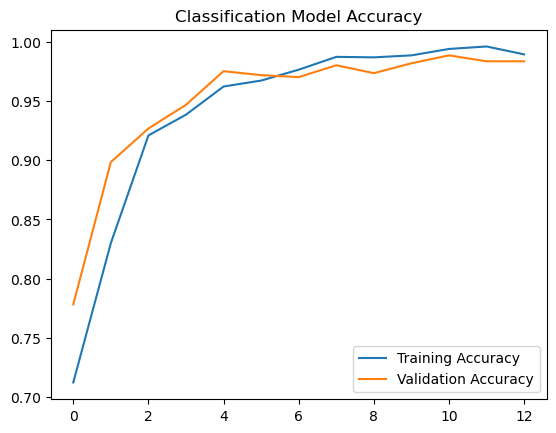

In [18]:
plt.plot(accuracy,label='Training Accuracy')
plt.plot(val_accuracy,label='Validation Accuracy')
plt.legend()
plt.title('Classification Model Accuracy')
plt.show()

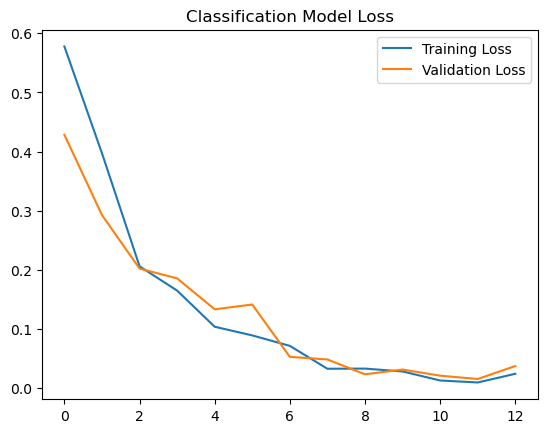

In [19]:

plt.plot(loss,label='Training Loss',)
plt.plot(val_loss,label='Validation Loss')

plt.legend()
plt.title('Classification Model Loss')
plt.show()